In [1]:
import pandas as pd
import numpy as np
import os
import glob

# set infinite display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## This notebook contains preliminary metadata analysis to search for bias. A bias analysis function will be incorporated into the pipeline at a later date, and this notebook is useful as a reference for that.

In [2]:
# load the metadata file
df_total = pd.read_csv('../../results/metadata.tsv', sep='\t')

In [3]:
# import filenames inside of ./local_results into list
filenames = glob.glob("../../data/local_results/sf/*")

# only keep filenames with .salmon in them
filenames = [x for x in filenames if '.salmon' in x]

# only keep everything before the first period and after the last /
filenames = [x.split('/')[-1].split('.')[0] for x in filenames]

# see if the filenames match the case_id's in the dataframe
output = []
for x in filenames:
    if x not in df_total['read_group_id'].values:
        output.append(x)
        
print('Number of files in local_results: ', len(filenames))
print('Number of files in local_results that don\'t have an entry in the metadata dataframe: ', len(output))

Number of files in local_results:  888
Number of files in local_results that don't have an entry in the metadata dataframe:  0


In [19]:
#create new dataframe using filemames and only keep the rows that have read_group_id equal to something in filenames
df_current_data = df_total[df_total['read_group_id'].isin(filenames)]

#remove duplicate case_id's
df_current_data = df_current_data.drop_duplicates(subset=['case_id'])

# print the shapes of the dataframes
print('Shape of metadata dataframe: ', df_total.shape)
print('Shape of dataframe with only current data: ', df_current_data.shape)

Shape of metadata dataframe:  (3355, 133)
Shape of dataframe with only current data:  (792, 133)


In [20]:
# preview the dataframe
df_current_data.head()

,case_id,aliquot_id,read_group_id,has_blood_cancer,tissue_type,instrument_model,RIN,includes_spike_ins,library_preparation_kit_name,library_preparation_kit_vendor,library_preparation_kit_version,library_preparation_kit_catalog_number,library_selection,library_strand,library_strategy,size_selection_range,spike_ins_concentration,demographic_id,diagnosis_id,batch_id,index_date,cause_of_death,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,adrenal_hormone,age_at_diagnosis,ajcc_clinical_m,ajcc_clinical_n,ajcc_clinical_stage,ajcc_clinical_t,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_staging_system_edition,ann_arbor_b_symptoms,ann_arbor_b_symptoms_described,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,ann_arbor_pathologic_stage,best_overall_response,burkitt_lymphoma_clinical_variant,child_pugh_classification,classification_of_tumor,cog_liver_stage,cog_neuroblastoma_risk_group,cog_renal_stage,cog_rhabdomyosarcoma_risk_group,created_datetime,days_to_best_overall_response,days_to_diagnosis,days_to_last_follow_up,days_to_last_known_disease_status,days_to_recurrence,diagnosis_is_primary_disease,eln_risk_classification,enneking_msts_grade,enneking_msts_metastasis,enneking_msts_stage,enneking_msts_tumor_site,esophageal_columnar_dysplasia_degree,esophageal_columnar_metaplasia_present,figo_stage,figo_staging_edition_year,first_symptom_prior_to_diagnosis,gastric_esophageal_junction_involvement,gleason_grade_group,gleason_grade_tertiary,gleason_patterns_percent,goblet_cells_columnar_mucosa_present,icd_10_code,igcccg_stage,inpc_grade,inpc_histologic_group,inrg_stage,inss_stage,international_prognostic_index,irs_group,irs_stage,ishak_fibrosis_score,iss_stage,last_known_disease_status,laterality,margin_distance,margins_involved_site,masaoka_stage,medulloblastoma_molecular_classification,metastasis_at_diagnosis,metastasis_at_diagnosis_site,method_of_diagnosis,micropapillary_features,mitosis_karyorrhexis_index,mitotic_count,morphology,ovarian_specimen_status,ovarian_surface_involvement,papillary_renal_cell_type,peritoneal_fluid_cytological_status,pregnant_at_diagnosis,primary_diagnosis,primary_disease,primary_gleason_grade,prior_malignancy,prior_treatment,progression_or_recurrence,project_id.1,residual_disease,satellite_nodule_present,secondary_gleason_grade,site_of_resection_or_biopsy,sites_of_involvement,submitter_id,supratentorial_localization,synchronous_malignancy,tissue_or_organ_of_origin,tumor_confined_to_organ_of_origin,tumor_depth,tumor_focality,tumor_grade,tumor_regression_grade,updated_datetime,weiss_assessment_score,who_cns_grade,who_nte_grade,wilms_tumor_histologic_subtype,year_of_diagnosis,disease_type,primary_site,project_id
2,763e0702-8379-4b5e-95d1-a84f412c51e7,ce810e2e-4929-4bbc-95ff-6da493477391,c2980255-7c57-4b79-82a7-f77098ff164e,False,Tumor,Illumina HiSeq 4000,NaN,True,TruSeq Stranded Total RNA Library Prep Kit wit...,Illumina,NaN,NaN,rRNA Depletion,First_Stranded,RNA-Seq,342.0,1.0,2cb2a0b4-acd0-4529-b7ed-deaf1aa119c6,5e74687f-b68b-4891-9a20-1a68826ca706,2.0,Diagnosis,NaN,-22179.0,NaN,not hispanic or latino,female,white,Alive,NaN,22179.0,Unknown,NaN,NaN,NaN,Unknown,NX,Stage II,T2b,7th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-17T14:05:59.588773-05:00,NaN,NaN,1785.0,1785.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,With tumor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8312/3,NaN,NaN,NaN,NaN,NaN,"Renal cell carcinoma, NOS",NaN,NaN,NaN,NaN,yes,CPTAC-3,R0,NaN,NaN,"Kidney, NOS",NaN,C3L-00908-DIAG,NaN,NaN,"Kidney, NOS",NaN,NaN,Unifocal,G3,NaN,2023-02-03T18:28:48.308091-06:00,NaN,NaN,NaN,NaN,2016.0,Adenomas and Adenocarcinomas,Kidney,CPTAC-3
5,8710ce04-6b7f-4e37-adc0-0df1f2798b30,f0d170a6-dc9d-4334-8a34-3c0ec44fd359,7af5dc64-987e-49b3-a28b-8b17dfb9146c,False,Tumor,Illumina HiSeq 4000,NaN,True,TruSeq Stranded Total RNA Library Prep Kit wit...,Illumina,NaN,NaN,rRNA Depletion,First_Str

In [22]:
#check for duplicate case_id's and provide sum
df_current_data[df_current_data.duplicated(subset=['case_id'])].shape

(0, 133)

In [6]:
# print disease counts from both dataframes
print('Disease counts from metadata dataframe: ')
print(df_total['disease_type'].value_counts())
print('\nDisease counts from dataframe with only current data: ')
print(df_current_data['disease_type'].value_counts())

Disease counts from metadata dataframe: 
Adenomas and Adenocarcinomas            1555
Squamous Cell Neoplasms                  669
Gliomas                                  261
Ductal and Lobular Neoplasms             260
Nevi and Melanomas                       239
Myeloid Leukemias                        179
Soft Tissue Tumors and Sarcomas, NOS     164
Not Applicable                            27
Name: disease_type, dtype: int64

Disease counts from dataframe with only current data: 
Adenomas and Adenocarcinomas            400
Squamous Cell Neoplasms                 181
Ductal and Lobular Neoplasms             80
Gliomas                                  67
Nevi and Melanomas                       67
Soft Tissue Tumors and Sarcomas, NOS     45
Myeloid Leukemias                        40
Not Applicable                            8
Name: disease_type, dtype: int64


In [7]:
#find missingness for every column in df5 and display as percentage
df_current_data.isnull().sum()/df_current_data.shape[0]*100

case_id                                       0.000000
aliquot_id                                    0.000000
read_group_id                                 0.000000
has_blood_cancer                              0.000000
tissue_type                                   0.000000
instrument_model                              7.657658
RIN                                         100.000000
includes_spike_ins                            7.657658
library_preparation_kit_name                  7.657658
library_preparation_kit_vendor                7.657658
library_preparation_kit_version             100.000000
library_preparation_kit_catalog_number      100.000000
library_selection                             0.000000
library_strand                                7.657658
library_strategy                              0.000000
size_selection_range                         40.765766
spike_ins_concentration                       7.657658
demographic_id                               34.346847
diagnosis_

In [8]:
#for the disease_type Adenomas and Adenocarcinomas, show the missingness of the columns 
df_current_data[df_current_data['disease_type'] == 'Adenomas and Adenocarcinomas'].isnull().sum()

case_id                                       0
aliquot_id                                    0
read_group_id                                 0
has_blood_cancer                              0
tissue_type                                   0
instrument_model                             49
RIN                                         400
includes_spike_ins                           49
library_preparation_kit_name                 49
library_preparation_kit_vendor               49
library_preparation_kit_version             400
library_preparation_kit_catalog_number      400
library_selection                             0
library_strand                               49
library_strategy                              0
size_selection_range                        128
spike_ins_concentration                      49
demographic_id                               23
diagnosis_id                                 23
batch_id                                     23
index_date                              

In [9]:
#find missingness for age_at_diagnosis, race, and gender
print(df_current_data['age_at_diagnosis'].isnull().sum())
print(df_current_data['race'].isnull().sum())
print(df_current_data['gender'].isnull().sum())


325
305
305


In [10]:
# Assuming your DataFrame is named df
gender_counts = df_current_data['gender'].value_counts()

# Display the unique values and their counts
print(gender_counts)

male      319
female    264
Name: gender, dtype: int64


In [11]:
# Assuming your DataFrame is named df
gender_counts_by_disease = df_current_data.groupby('disease_type')['gender'].value_counts()

# Display the unique values and their counts subgrouped by 'disease_type'
print(gender_counts_by_disease)

disease_type                  gender
Adenomas and Adenocarcinomas  female    199
                              male      178
Ductal and Lobular Neoplasms  male       39
                              female     34
Gliomas                       female     11
                              male       11
Squamous Cell Neoplasms       male       91
                              female     20
Name: gender, dtype: int64


/var/folders/j4/1x0dc4g11wg0cfys1nmslw040000gn/T/ipykernel_6762/1263048805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_data['age_at_diagnosis'] = df_current_data['age_at_diagnosis']/365


<Axes: title={'center': 'age_at_diagnosis'}, xlabel='disease_type'>

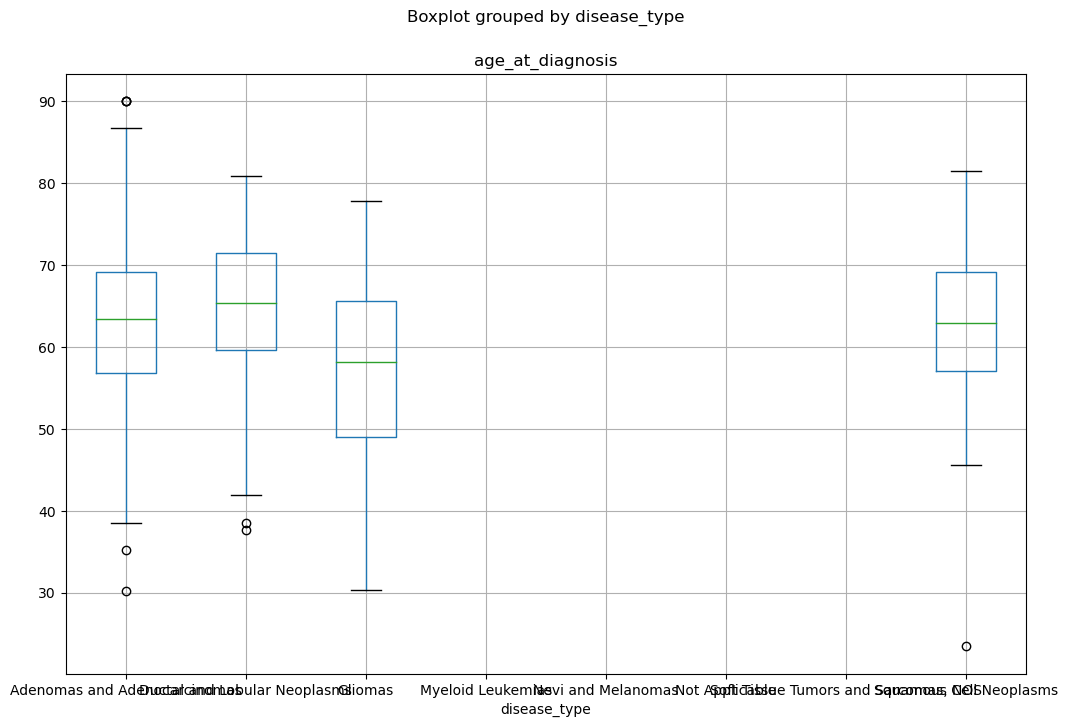

In [12]:
# plot box plot of age_at_diagnosis (convert to years) for each disease_type
df_current_data['age_at_diagnosis'] = df_current_data['age_at_diagnosis']/365
df_current_data.boxplot(column='age_at_diagnosis', by='disease_type', figsize=(12,8))

In [13]:
# print missing and total values for age_at_diagnosis in the dataframe with only current data
print('Missing values for age_at_diagnosis: ', df_current_data['age_at_diagnosis'].isnull().sum())
print('Total values for age_at_diagnosis: ', len(df_current_data['age_at_diagnosis']))

# print missing and total values for race in the dataframe with only current data
print('Missing values for race: ', df_current_data['race'].isnull().sum())
print('Total values for race: ', len(df_current_data['race']))

# print missing and total values for gender in the dataframe with only current data
print('Missing values for gender: ', df_current_data['gender'].isnull().sum())
print('Total values for gender: ', len(df_current_data['gender']))

Missing values for age_at_diagnosis:  325
Total values for age_at_diagnosis:  888
Missing values for race:  305
Total values for race:  888
Missing values for gender:  305
Total values for gender:  888


In [14]:
#run a chi square test to see if disease_type is significantly different because of gender using df_current_data
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Assuming that df_current_data is a DataFrame with 'disease_type' and 'gender' columns
contingency_table = pd.crosstab(df_current_data['disease_type'], df_current_data['gender'])

# Perform Chi-Square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic, p-value and degrees of freedom
print(f"Test statistic: {stat}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Print the expected contingency table
print("Expected contingency table:")
print(expected)

Test statistic: 42.11276429881666
P-value: 3.797034264893025e-09
Degrees of freedom: 3
Expected contingency table:
[[170.71698113 206.28301887]
 [ 33.05660377  39.94339623]
 [  9.96226415  12.03773585]
 [ 50.26415094  60.73584906]]


In [15]:
#run a chi square test to see if disease_type is significantly different because of race using df_current_data
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Assuming that df_current_data is a DataFrame with 'disease_type' and 'race' columns
contingency_table = pd.crosstab(df_current_data['disease_type'], df_current_data['race'])

# Perform Chi-Square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic, p-value and degrees of freedom
print(f"Test statistic: {stat}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Print the expected contingency table
print("Expected contingency table:")
print(expected)

Test statistic: 34.40761611352327
P-value: 0.0029837765360479075
Degrees of freedom: 15
Expected contingency table:
[[1.93996569e+00 6.85454545e+01 3.87993139e+00 4.52658662e+00
  6.53121784e+01 2.32795883e+02]
 [3.75643225e-01 1.32727273e+01 7.51286449e-01 8.76500858e-01
  1.26466552e+01 4.50771870e+01]
 [1.13207547e-01 4.00000000e+00 2.26415094e-01 2.64150943e-01
  3.81132075e+00 1.35849057e+01]
 [5.71183533e-01 2.01818182e+01 1.14236707e+00 1.33276158e+00
  1.92298456e+01 6.85420240e+01]]


In [16]:
#perform ANOVA on age_at_diagnosis for each disease_type
import scipy.stats as stats

result = stats.f_oneway(
                df_current_data[df_current_data['disease_type'] == 'Adenomas and Adenocarcinomas']['age_at_diagnosis'].notnull(),
                df_current_data[df_current_data['disease_type'] == 'Squamous Cell Neoplasms']['age_at_diagnosis'].notnull(),
                df_current_data[df_current_data['disease_type'] == 'Ductal and Lobular Neoplasms']['age_at_diagnosis'].notnull(),
                df_current_data[df_current_data['disease_type'] == 'Gliomas']['age_at_diagnosis'].notnull()
                )

print(result)

F_onewayResult(statistic=59.19437379259734, pvalue=3.1271355541893578e-34)
